In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
data = datasets.load_digits(return_X_y=True)
pd.DataFrame(data[0])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [3]:
x , y = data

In [4]:
i = np.random.randint(0 , 1796)
i

1189

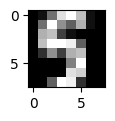

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(x[i].reshape(8,8) , "gray")

In [6]:
y[i]

5

In [7]:
pd.DataFrame(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [24]:
for c in [0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 0.5 , 1 , 5 , 10 , 100]:
    model = LogisticRegression(max_iter=(10000) , solver="saga" , C=c)
    model.fit(x_train , y_train)
    print(f"C={c} | Train acc: {model.score(x_train , y_train):.3f} | Test acc: {model.score(x_test , y_test):.3f}")

C=1e-05 | Train acc: 0.870 | Test acc: 0.858
C=0.0001 | Train acc: 0.933 | Test acc: 0.914
C=0.001 | Train acc: 0.971 | Test acc: 0.958
C=0.01 | Train acc: 0.992 | Test acc: 0.972
C=0.1 | Train acc: 1.000 | Test acc: 0.975
C=0.5 | Train acc: 1.000 | Test acc: 0.972
C=1 | Train acc: 1.000 | Test acc: 0.972
C=5 | Train acc: 1.000 | Test acc: 0.972
C=10 | Train acc: 1.000 | Test acc: 0.972
C=100 | Train acc: 1.000 | Test acc: 0.972


In [28]:
model = LogisticRegression(max_iter=(10000) , solver="saga" , C=0.0001)
model.fit(x_train , y_train)

LogisticRegression(C=0.0001, max_iter=10000, solver='saga')

In [29]:
model.score(x_train , y_train)

0.9331941544885177

In [30]:
model.score(x_test , y_test)

0.9138888888888889

In [27]:
print(classification_report(y_train , model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.87      0.90      0.89       146
           2       0.97      0.96      0.96       147
           3       0.98      0.91      0.94       150
           4       0.98      0.94      0.96       136
           5       0.95      0.95      0.95       151
           6       0.98      0.97      0.98       143
           7       0.90      0.99      0.94       144
           8       0.89      0.81      0.85       134
           9       0.84      0.92      0.88       142

    accuracy                           0.93      1437
   macro avg       0.93      0.93      0.93      1437
weighted avg       0.94      0.93      0.93      1437



----

In [31]:
k = np.random.randint(1 , 16 , (1 , 64))
k.shape

(1, 64)

In [32]:
probabilities = model.predict_proba(k)
probabilities

array([[0.13989885, 0.04963623, 0.09531072, 0.08449237, 0.11385899,
        0.15489496, 0.1063452 , 0.09946331, 0.05469689, 0.10140249]])

In [33]:
threshold = 0.33

In [34]:
max_prob = np.max(probabilities)
max_prob

0.15489495678760357

In [35]:
predict_class = np.argmax(probabilities)
predict_class

5

In [36]:
if max_prob < threshold :
    print(f"hich ehtemali baraye hich classi nist")
else:
    print(f"ehtemalan dar classe {predict_class:} gharar dare ba ehtemale {max_prob:.2f}")

hich ehtemali baraye hich classi nist


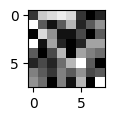

In [37]:
plt.figure(figsize=(1,1))
plt.imshow(k.reshape(8,8) , "gray")